In [1]:
# import libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the file

df = pd.read_csv('train.csv')

# first 5 rows of the data

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# shap of the data

df.shape

(2000, 21)

In [4]:
# data types and null values of the train set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Combine 4 'price_range' catagories into 2

In [6]:
# unique values belong to price_range

df['price_range'].unique()

array([1, 2, 3, 0])

In [7]:
# change 4 classes of price to 2

for i in df[df['price_range'] == 1].index.tolist():
  df.iloc[i, 20] = 0

for i in df[df['price_range'] == 2].index.tolist():
  df.iloc[i, 20] = 1

for i in df[df['price_range'] == 3].index.tolist():
  df.iloc[i, 20] = 1

In [8]:
# check the unique values again

df['price_range'].unique()

array([0, 1])

## 1) Create a class for for forward selection

In [9]:
# create a class for forward selection model

class SequentialForwardSelection():
    def __init__(self, estimator, k_features):
        self.estimator = clone(estimator)
        self.k_features = k_features
    def fit(self, X_train, X_test, y_train, y_test):
        max_indices = tuple(range(X_train.shape[1]))
        total_features_count = len(max_indices)
        self.subsets_ = []
        self.scores_ = []
        self.indices_ = []
        scores = []
        subsets = []
        for p in combinations(max_indices, r=1):
                score = self._calc_score(X_train.values, X_test.values,
                                         y_train.values, y_test.values, p)
                scores.append(score)
                subsets.append(p)
        best_score_index = np.argmax(scores)
        self.scores_.append(scores[best_score_index])
        self.indices_ = list(subsets[best_score_index])
        self.subsets_.append(self.indices_)
        dim = 1
        while dim < self.k_features:
            scores = []
            subsets = []
            current_feature = dim
            idx = 0
            while idx < total_features_count:
                if idx not in self.indices_:
                    indices = list(self.indices_)
                    indices.append(idx)
                    score = self._calc_score(X_train.values, X_test.values,
                                             y_train.values, y_test.values,indices)
                    scores.append(score)
                    subsets.append(indices)
                idx += 1
            best_score_index = np.argmax(scores)
            self.scores_.append(scores[best_score_index])
            self.indices_ = list(subsets[best_score_index])
            self.subsets_.append(self.indices_)
            dim += 1
        self.k_score_ = self.scores_[-1]
    def transform(self, X):
        return X.values[:, self.indices_]
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train.ravel())
        y_pred = self.estimator.predict(X_test[:, indices])
        score = roc_auc_score(y_test, y_pred)
        return score

In [10]:
# make a feature matrix (X) and a target vector (y)
# and split dataset to train and test

X_train, X_test, y_train, y_test = \
train_test_split(df.iloc[:, :-1], df['price_range'],
                 test_size=0.20, random_state=2022)

In [11]:
# find the optimum model with best features

lr = LogisticRegression(C=1.0, random_state=2022)

n_features = 20 # number of features

sfs = SequentialForwardSelection(lr, n_features)

sfs.fit(X_train, X_test, y_train, y_test)


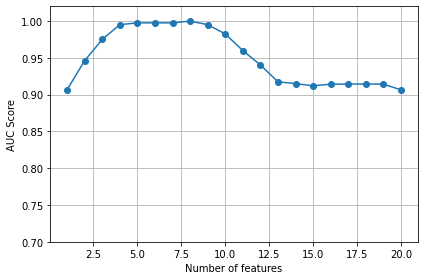

In [12]:
# plot AUC score for different combination of the features

n_features = [len(n) for n in sfs.subsets_]
plt.plot(n_features, sfs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('AUC Score')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

## 2) Logistic regression with 8 best features

In [13]:
# find the features that gives the best AUC score

sfs.subsets_[7]

[13, 11, 0, 12, 18, 19, 1, 8]

In [14]:
# create a new df and sub datasets with above features

df_new = df.iloc[:, [13, 11, 0, 12, 18, 19, 1, 8, 20]]

X_train_new, X_test_new, y_train_new, y_test_new = \
train_test_split(df_new.iloc[:, :-1], df_new['price_range'],
                 test_size=0.20, random_state=2022)

In [15]:
# use Logistic Regression model with best features

lr.fit(X_train_new, y_train_new)

# report f1, recall and precision scores

y_pred_new = lr.predict(X_test_new)

print(f'Logistic Regression scores:\n')
print(classification_report(y_test, y_pred_new))

Logistic Regression scores:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       208

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



## 3) PCA analysis

In [16]:
# PCA analysis

sc = StandardScaler()
 
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [17]:
pca = PCA(n_components = 8)

X_train_st = pca.fit_transform(X_train)
X_test_st = pca.transform(X_test)

## 4) Logistic regression + PCA analysis

In [18]:
# use Logistic Regression on analysed data

lr.fit(X_train_st, y_train)

# report f1, recall and precision scores

y_pred = lr.predict(X_test_new)

print(f'Logistic Regression scores after PCA analysis:\n')
print(classification_report(y_test, y_pred))

Logistic Regression scores after PCA analysis:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.52      1.00      0.68       208

    accuracy                           0.52       400
   macro avg       0.26      0.50      0.34       400
weighted avg       0.27      0.52      0.36       400



## 7) SVM models

In [19]:
# SVM

svc_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

C_list = [0.001, 0.01, 0.1]

def svm_analysis(c, Kernel, X_train, X_test, y_train, y_test):
  svc = SVC(C= c, kernel=Kernel)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print(f'SVM scores with C={c} and Kernel={Kernel}:\n')
  print(classification_report(y_test, y_pred), '\n\n\n')

In [20]:
for i in svc_kernel:
  for j in C_list:
    svm_analysis(j, i, X_train, X_test, y_train, y_test)

SVM scores with C=0.001 and Kernel=linear:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       208

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400
 



SVM scores with C=0.01 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       208

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400
 



SVM scores with C=0.1 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       192
           1       1.00      1.00      1.00       208

    accuracy                           1.00  

### 9.a) Bining the 'battery_power' column

In [21]:
# bining 'battery_power' column

print('First bin is battery powers less than ', 
      (df['battery_power'].min() + df['battery_power'].mean()) /2, '\n')

print('Second bin is battery powers between ', df['battery_power'].mean(), 
      ' and ', (df['battery_power'].max()+df['battery_power'].mean()) / 2, '\n')

print('Third bin is battery powers more than', df['battery_power'].max()+1)

First bin is battery powers less than  869.75925 

Second bin is battery powers between  1238.5185  and  1618.25925 

Third bin is battery powers more than 1999


In [22]:
def get_bat_grp(battery_power):
    
    if battery_power < 869.75925:
        return 'low'
    
    elif (battery_power > 869.75925) & (battery_power < 1618.25925):
        return 'medium'
    
    elif (battery_power > 1618.25925) & (battery_power < 1999):
        return 'high'

In [23]:
battery_bin = df['battery_power'].apply(get_bat_grp)

df_bin = df.copy()

df_bin.insert(1, 'battery_bin', battery_bin)

df_bin.drop('battery_power', axis=1, inplace=True)

df_bin.head()

,battery_bin,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,low,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,medium,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,low,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,low,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,high,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


## 9.b + 10) One Hot Encoding on categorical features + SVM models


In [24]:
# One Hot Encoding

df_bin = pd.get_dummies(df_bin)

price_column = df_bin.pop('price_range')

df_bin.insert(22, 'price_range', price_column)

df_bin.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_bin_high,battery_bin_low,battery_bin_medium,price_range
0,0,2.2,0,1,0,7,0.6,188,2,2,...,9,7,19,0,0,1,0,1,0,0
1,1,0.5,1,0,1,53,0.7,136,3,6,...,17,3,7,1,1,0,0,0,1,1
2,1,0.5,1,2,1,41,0.9,145,5,6,...,11,2,9,1,1,0,0,1,0,1
3,1,2.5,0,0,0,10,0.8,131,6,9,...,16,8,11,1,0,0,0,1,0,1
4,1,1.2,0,13,1,44,0.6,141,2,14,...,8,2,15,1,1,0,1,0,0,0


In [25]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = \
train_test_split(df_bin.iloc[:, :-1], df_bin['price_range'],
                 test_size=0.20, random_state=2022)

for i in svc_kernel:
  for j in C_list:
    svm_analysis(j, i, X_train_bin, X_test_bin, y_train_bin, y_test_bin)

SVM scores with C=0.001 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       192
           1       0.98      0.89      0.93       208

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400
 



SVM scores with C=0.01 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       192
           1       0.99      0.93      0.96       208

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400
 



SVM scores with C=0.1 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       1.00      0.96      0.98       208

    accuracy                           0.98  

## 9-c) Log transformation

In [26]:
for col in df_bin.columns:
   print(f'{col} range: [{df_bin[col].min()}, {df_bin[col].max()}]')


blue range: [0, 1]
clock_speed range: [0.5, 3.0]
dual_sim range: [0, 1]
fc range: [0, 19]
four_g range: [0, 1]
int_memory range: [2, 64]
m_dep range: [0.1, 1.0]
mobile_wt range: [80, 200]
n_cores range: [1, 8]
pc range: [0, 20]
px_height range: [0, 1960]
px_width range: [500, 1998]
ram range: [256, 3998]
sc_h range: [5, 19]
sc_w range: [0, 18]
talk_time range: [2, 20]
three_g range: [0, 1]
touch_screen range: [0, 1]
wifi range: [0, 1]
battery_bin_high range: [0, 1]
battery_bin_low range: [0, 1]
battery_bin_medium range: [0, 1]
price_range range: [0, 1]


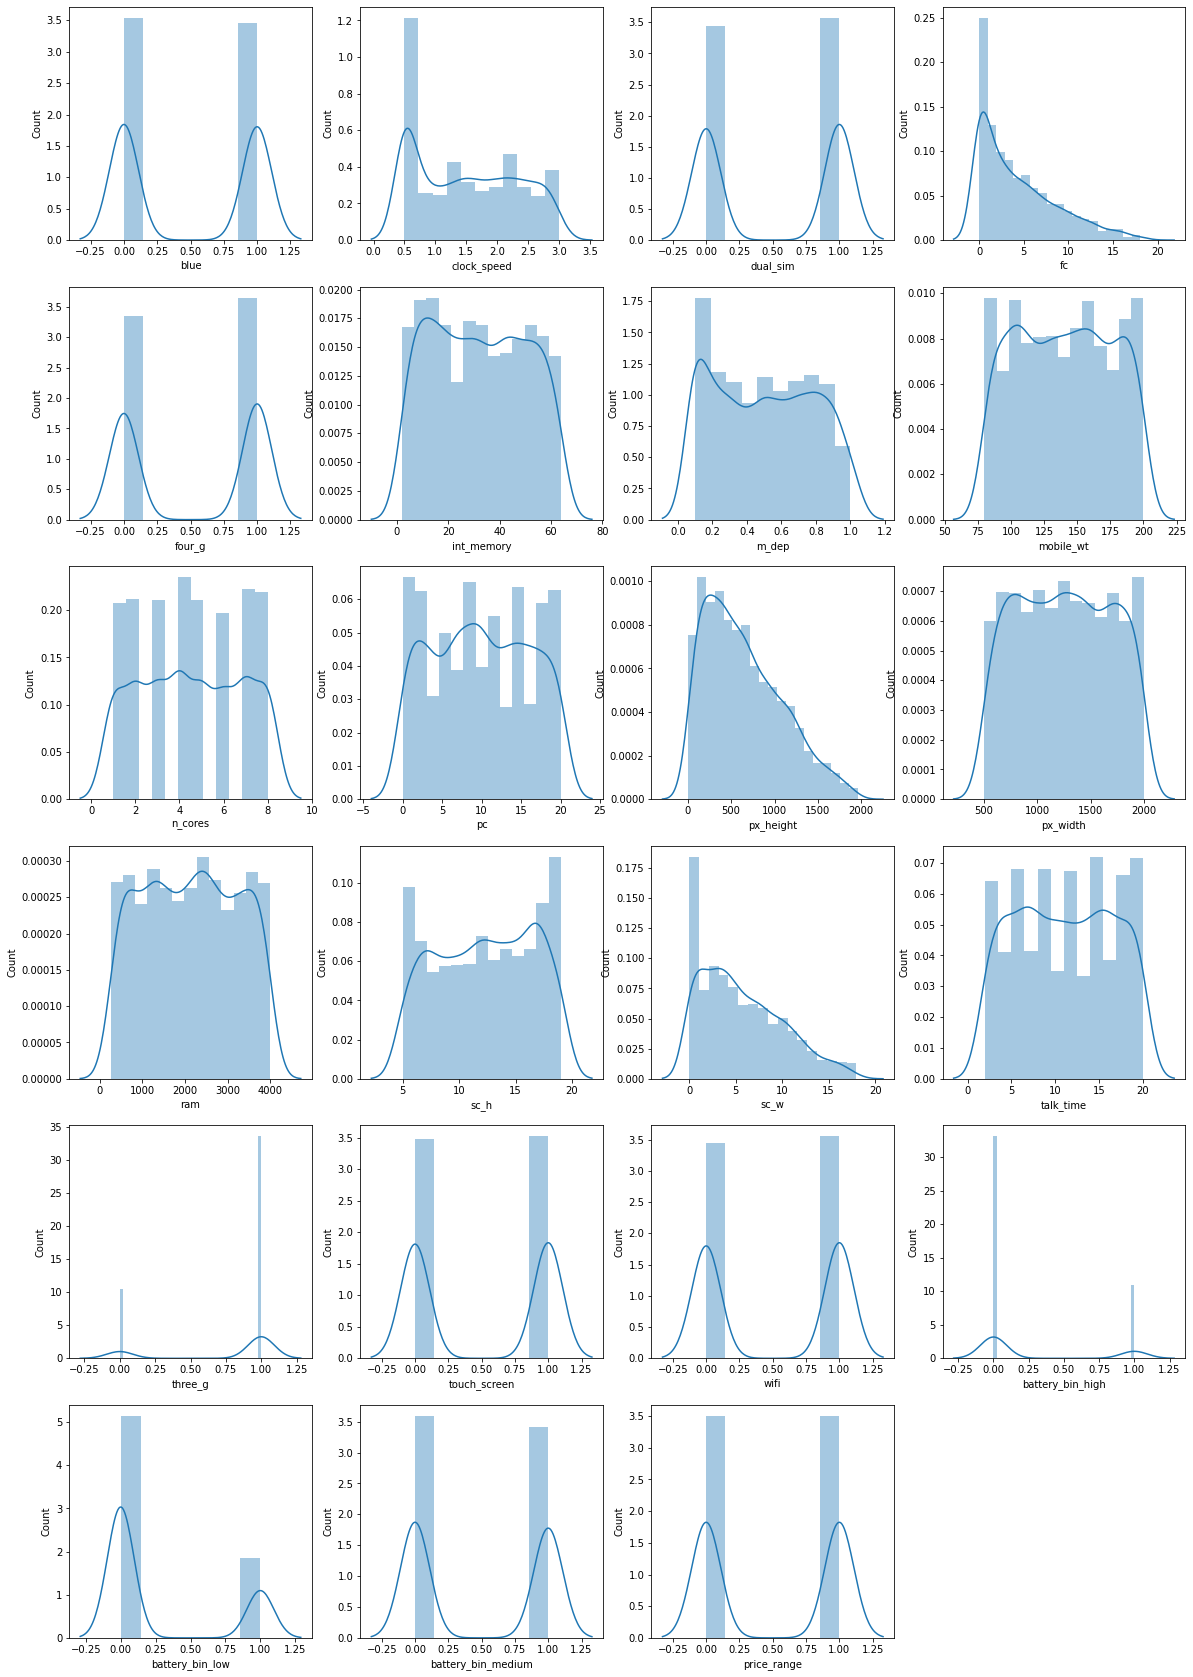

In [27]:
# plot the distribution of the columns
import seaborn as sns
i=1
plt.figure(figsize=(20,30))
for col in df_bin.columns:
   plt.subplot(6,4,i)
   sns.distplot(df_bin[col], kde=True)
   plt.xlabel(col)
   plt.ylabel('Count')
   i+=1

In [28]:
# min-max normalization on columns
 
df_norm = df_bin.copy()
 
for col in df_norm:
    df_norm[col] = (df_bin[col] - df_bin[col].min()) / (df_bin[col].max() - df_bin[col].min())
    
df_norm


,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_bin_high,battery_bin_low,battery_bin_medium,price_range
0,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,...,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,...,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,...,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,...,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,...,0.214286,0.111111,0.722222,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,...,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1996,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,...,0.428571,0.555556,0.777778,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1997,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,...,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1998,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,...,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [29]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
blue,2000.0,0.495000,0.500100,0.0,0.000000,0.000000,1.000000,1.0
clock_speed,2000.0,0.408900,0.326402,0.0,0.080000,0.400000,0.680000,1.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.000000,1.000000,1.000000,1.0
fc,2000.0,0.226816,0.228497,0.0,0.052632,0.157895,0.368421,1.0
four_g,2000.0,0.521500,0.499662,0.0,0.000000,1.000000,1.000000,1.0
int_memory,2000.0,0.484621,0.292673,0.0,0.225806,0.483871,0.741935,1.0
m_dep,2000.0,0.446389,0.320462,0.0,0.111111,0.444444,0.777778,1.0
mobile_wt,2000.0,0.502075,0.294997,0.0,0.241667,0.508333,0.750000,1.0
n_cores,2000.0,0.502929,0.326834,0.0,0.285714,0.428571,0.857143,1.0
pc,2000.0,0.495825,0.303216,0.0,0.250000,0.500000,0.750000,1.0


## 9-d + 10) Add area feature

In [30]:
# create an area feature

df_bin['area'] = df_bin['px_height']*df_bin['px_width']

price_column = df_bin.pop('price_range')

df_bin.insert(23, 'price_range', price_column)

df_bin.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,sc_w,talk_time,three_g,touch_screen,wifi,battery_bin_high,battery_bin_low,battery_bin_medium,area,price_range
0,0,2.2,0,1,0,7,0.6,188,2,2,...,7,19,0,0,1,0,1,0,15120,0
1,1,0.5,1,0,1,53,0.7,136,3,6,...,3,7,1,1,0,0,0,1,1799140,1
2,1,0.5,1,2,1,41,0.9,145,5,6,...,2,9,1,1,0,0,1,0,2167308,1
3,1,2.5,0,0,0,10,0.8,131,6,9,...,8,11,1,0,0,0,1,0,2171776,1
4,1,1.2,0,13,1,44,0.6,141,2,14,...,2,15,1,1,0,1,0,0,1464096,0


In [31]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = \
train_test_split(df_bin.iloc[:, :-1], df_bin['price_range'],
                 test_size=0.20, random_state=2022)

for i in svc_kernel:
  for j in C_list:
    svm_analysis(j, i, X_train_bin, X_test_bin, y_train_bin, y_test_bin)

SVM scores with C=0.001 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       192
           1       0.98      0.88      0.93       208

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.93      0.93       400
 



SVM scores with C=0.01 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       192
           1       0.98      0.88      0.93       208

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400
 



SVM scores with C=0.1 and Kernel=linear:

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       192
           1       0.98      0.89      0.93       208

    accuracy                           0.94  

## 12+13) Decision Tree

In [32]:
# Decision Tree

criterion_list = ['gini', 'entropy']

max_depth_list = [2, 4, 6, 8, 10, 12]

def dt_analysis(Criterion, Max_dept, X_train, X_test, y_train, y_test):
  dt = DecisionTreeClassifier(criterion=Criterion, max_depth=Max_dept)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  print(f'DT scores with Criterion = {Criterion} and Max_dept = {Max_dept}:\n')
  print(classification_report(y_test, y_pred), '\n\n\n')

In [33]:
for i in criterion_list:
  for j in max_depth_list:
    dt_analysis(i, j, X_train, X_test, y_train, y_test)

DT scores with Criterion = gini and Max_dept = 2:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       192
           1       0.89      0.93      0.91       208

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400
 



DT scores with Criterion = gini and Max_dept = 4:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       192
           1       0.96      0.91      0.94       208

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400
 



DT scores with Criterion = gini and Max_dept = 6:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       192
           1       0.98      0.93      0.96       208

    accuracy         